In the last 2 files, we worked with **single layer neural networks**. These networks had a single layer of neurons. To make a prediction, a single layer of neurons in these networks directly fed their results into the output neuron(s).

In this file, we'll explore how **multi-layer networks** (also known as **deep neural networks**) are able to better capture nonlinearity in the data. In a deep neural network, the first layer of input neurons feeds into a second, intermediate layer of neurons

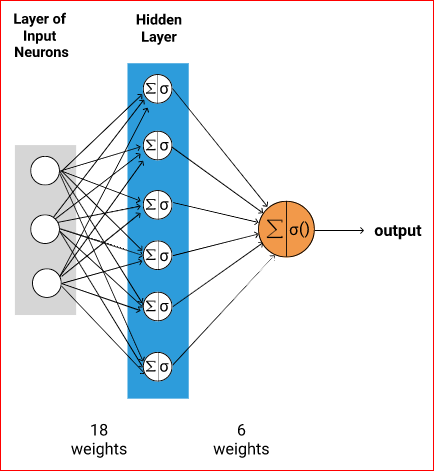

We included both of the functions that are used to compute each hidden neuron and output neuron to help clear up any confusion. We'll notice that the number of neurons in the second layer was more than those in the input layer. Choosing the number of neurons in this layer is a bit of an art form and not quite a science yet in neural network literature. We can actually add more intermediate layers, and this often leads to improved model accuracy (because of an increased capability in learning nonlinearity).

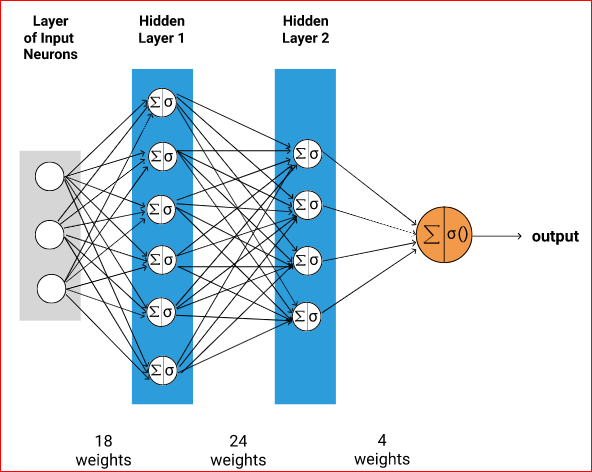

The intermediate layers are known as **hidden layers**, because they aren't directly represented in the input data or the output predictions. Instead, we can think of each hidden layer as intermediate features that are learned during the training process.

### Comparison With Decision Tree Models

This is actually very similar to how decision trees are structured. The branches and splits represent some intermediate features that are useful for making predictions and are analogous to the hidden layers in a neural network:

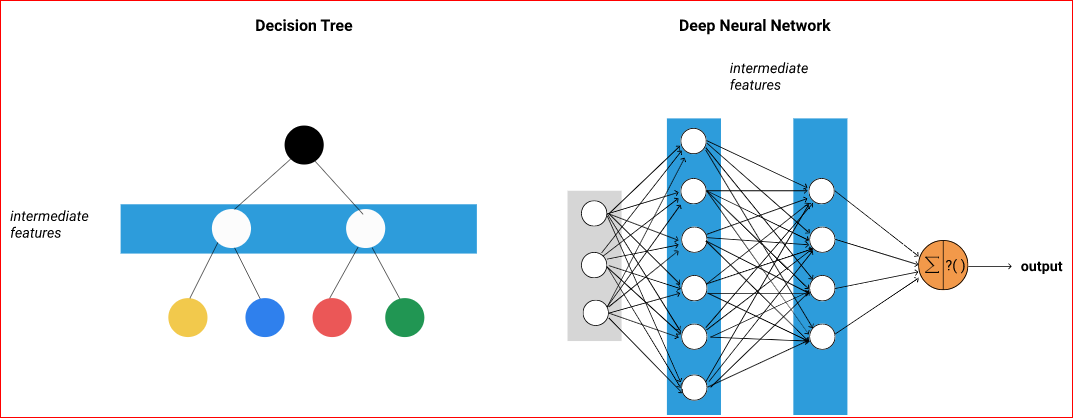

Each of these hidden layers has it's **own set of weights** and **biases**, which are discovered during the training process. In decision tree models, the intermediate features in the model represented something more concrete we can understand (feature ranges).

* Decision tree models are referred to as [white box models](https://en.wikipedia.org/wiki/White_box_%28software_engineering%29) because they can be observed and understood but not easily altered. After we train a decision tree model, we can visualize the tree, interpret it, and have new ideas for tweaking the model. 
* Neural networks, on the other hand, are much closer to being a [black box](https://en.wikipedia.org/wiki/Black_box#Testing_the_black_box_model). In a black box model, we can understand the inputs and the outputs but the intermediate features are actually difficult to interpret and understand. Even harder and perhaps more importantly, it's difficult to understand how to tweak a neural network based on these intermediate features.

In this file, we'll learn how adding more layers to a network and adding more neurons in the hidden layers can improve the model's ability to learn more complex relationships.

To generate data with nonlinearity in the features (both between the features and between the features and the target column), we can use the [make_moons()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) function from **scikit-learn**:

By default, `make_moons()` will generate `100 rows`` of data with `2 features`. Here's a plot that visualizes one feature against the other:

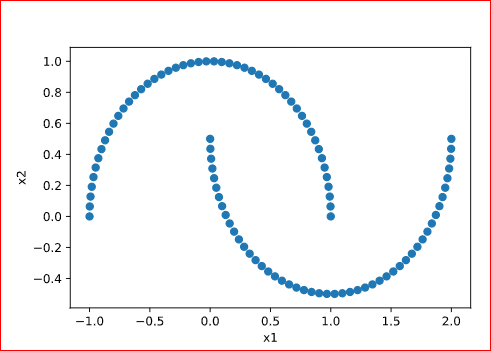

To make things interesting, let's add some Gaussian noise to the data. [Gaussian noise](https://en.wikipedia.org/wiki/Gaussian_noise) is a kind of statistical noise that follows the Gaussian distribution, and it's a common way to try to recreate the noise that's often found in real world data.

We can use the noise parameter to specify the standard deviation of the Gaussian noise we want added to the data. Let's also set the `random_state` to `3` so the generated data can be recreated:

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons

In [2]:
data = make_moons(100, random_state = 3, noise = 0.04)

features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

Text(0.5, 0, 'y')

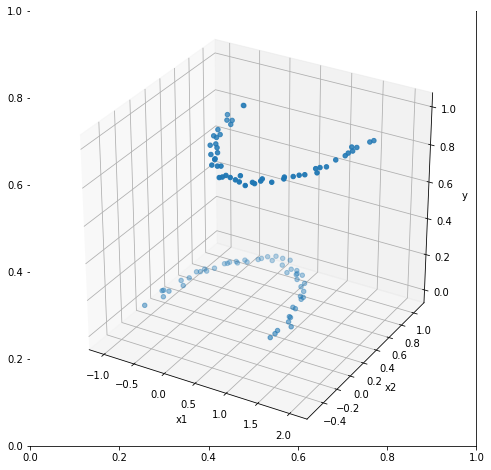

In [13]:
# Generate a 3d scatter plot of the data:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig,ax = plt.subplots(figsize = (8,8))

# Create and attach single axes object to this figure using the 3d projection
ax = fig.add_subplot(111, projection = "3d")

# Generate a 3d scatter plot with the first column from features on the x-axis, 
#the second column from features on the y-axis and labels on the z-axis.

ax.scatter(features[0], features[1], labels)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

[3d scatter plot](https://matplotlib.org/mpl_toolkits/mplot3d/api.html#mpl_toolkits.mplot3d.axes3d.Axes3D.scatter)

In the last file, we learned how adding a nonlinear activation function expanded the range of patterns that a model could try to learn. The following GIF demonstrates how adding the sigmoid function enables a logistic regression model to capture nonlinearity more effectively:

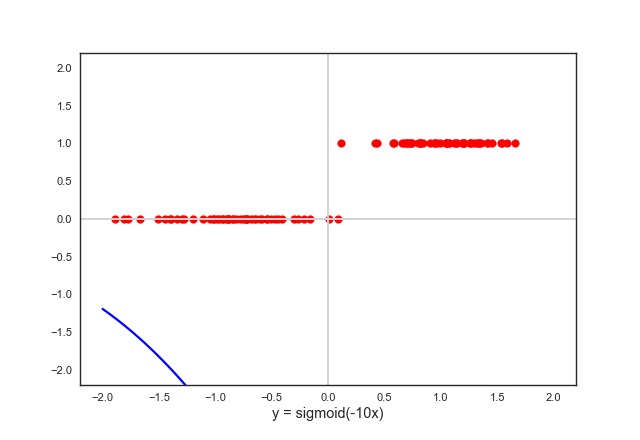

In [15]:
from IPython.display import Image

Image("log_model.gif")

We can think of a **logistic regression** model as a neural network with an activation function but no hidden layers. To make predictions, a linear combination of the features and weights is performed followed by a single sigmoid transformation.

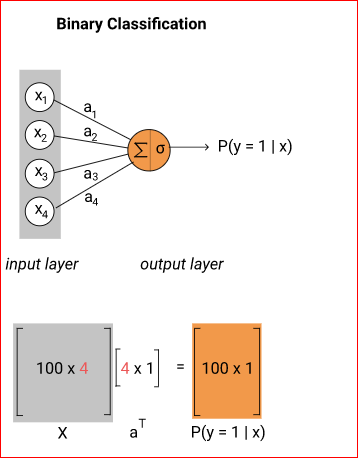

To improve the expressive power, we can add a hidden layer of neurons in between the input layer and the output layer. Here's an example where we've added a single hidden layer with a single neuron in between the input layer and the output layer:

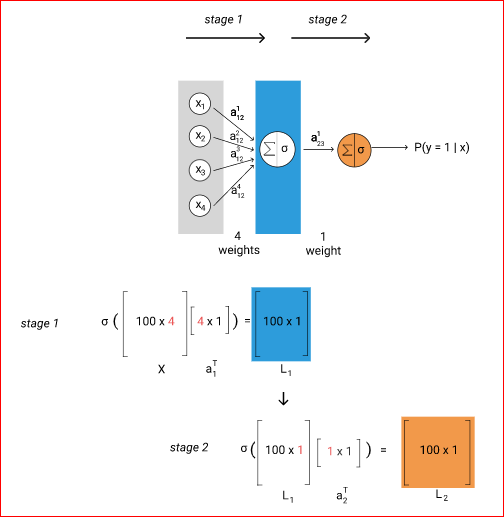

Above network contains two sets of weights that are learned during the training phase:

* `4` weights between the **input layer** and the **hidden layer**
* `1` weight between the **hidden layer** and the **output layer**

Scikit-learn contains two classes for working with neural networks:

* [MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
* [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

Let's focus on the `MLPClassifier` class.

We can specify the number of hidden neurons we want to use in each layer using the `hidden_layer_sizes` parameter. This parameter accepts a tuple where the index value corresponds to the number of neurons in that hidden layer. 
* The parameter is set to the tuple `(100,)` by default, which corresponds to a hundred neurons in a single hidden layer.

We can specify the activation function we want used in all layers using the activation parameter. This parameter accepts only the following string values:

* `identity`: the identity function
* `logistic`: the sigmoid function
* `tanh`: the hyperbolic tangent (tanh) function
* `relu`: the ReLU function

Here's a model instantiated with the sigmoid activation function:

`mlp = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic')`

While scikit-learn is friendly to use when learning new concepts, it has a few limitations when it comes to working with neural networks in production.

* At the time of writing, scikit-learn only supports using the same activation function for all layers.
* Scikit-learn also struggles to scale to larger datasets.
 * Libraries like [Theano](http://deeplearning.net/software/theano/) and [TensorFlow](https://www.tensorflow.org/) support offloading some computation to the GPU to overcome bottlenecks.

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

[accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [19]:
np.random.seed(8)

data = make_moons(100,random_state=3, noise = 0.04)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])
features["bias"] = 1

shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]

In [20]:
mid_length = int(len(shuffled_data)/2)

train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]

train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]

Train two different models using scikit-learn on the training set:
1. A standard **logistic regression** model
2. A **neural network** with:
 * A `single hidden` layer
 * A `single neuron` in the hidden layer
 * The `sigmoid` activation function

In [21]:
mpl = MLPClassifier(hidden_layer_sizes=(1,), activation= "logistic")
mpl.fit(train_features, train_labels)
nn_predictions = mpl.predict(test_features)

lr = LogisticRegression()
lr.fit(train_features, train_labels)
log_predictions = lr.predict(test_features)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
nn_accuracy = accuracy_score(test_labels, nn_predictions)
log_accuracy = accuracy_score(test_labels, log_predictions)

print("Logistic Regression Model Accuracy: ", log_accuracy)
print("Single Neuron Single Layer NN Model Accuracy: ", nn_accuracy)

Logistic Regression Model Accuracy:  0.88
Single Neuron Single Layer NN Model Accuracy:  0.48


We trained a **logistic regression** model and a **neural network** model with a **hidden layer** containing a **single neuron**. While we don't recommend using the **accuracy scores** to benchmark classification models in a production setting, they can helpful when we're learning and experimenting because they are easy to understand.

* The **logistic regression** model performed much better (accuracy of `88%`) compared to the **neural network** model with one hidden layer and one neuron (`48%`). This network architecture doesn't give the model much ability to capture nonlinearity in the data unfortunately, which is why logistic regression performed much better.

Let's take a look at a network with a single hidden layer of multiple neurons:

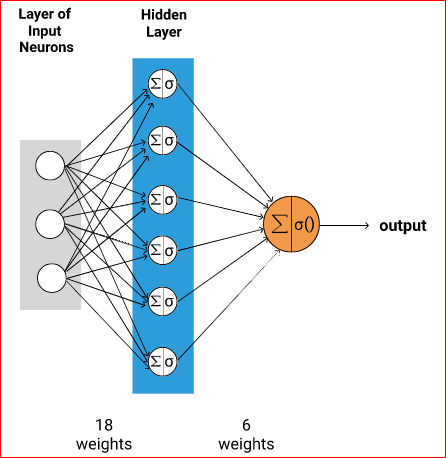

This network has `3` input neurons, `6` neurons in the single hidden layer, and `1` output neuron.
* We'll notice that there's an arrow between every input neuron and every hidden neuron `(3 x 6 = 18 connections)`, representing a **weight** that needs to be learned during the training process. 
* We'll notice that there's also a **weight** that needs to be learned between every hidden neuron and the final output neuron `(6 x 1 = 6 connections)`.

Because every neuron has a connection between itself and all of the neurons in the next layer, this is known as a **fully connected network**. Lastly, because the computation flows from **left (input layer)** to **right (hidden layer then to output layer)**, we can call this network a fully connected, feedforward network.

There are two weight matrices ($a_1$ and $a_2$) that need to be learned during the training process, one for each stage of the computation. Let's look at the linear algebra representation of this network.

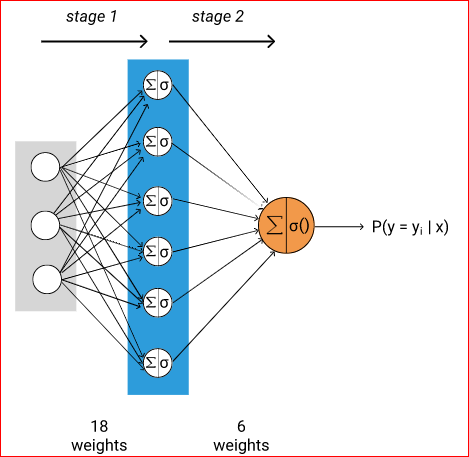

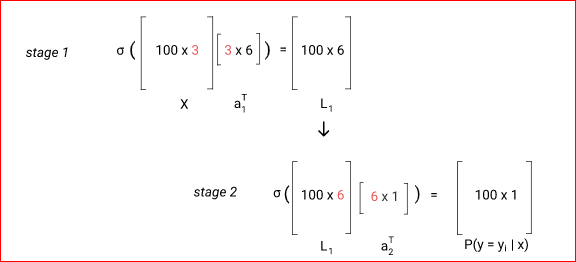

While we've discussed different architectures in this file, a deep neural network boils down to a series of matrix multiplications paired with nonlinear transformations! These are the key ideas that underlie all neural network architectures. Take a look at this conceptual diagram from [the Asimov Institute](https://www.asimovinstitute.org/neural-network-zoo/) that demonstrates a variety of neural network architectures:

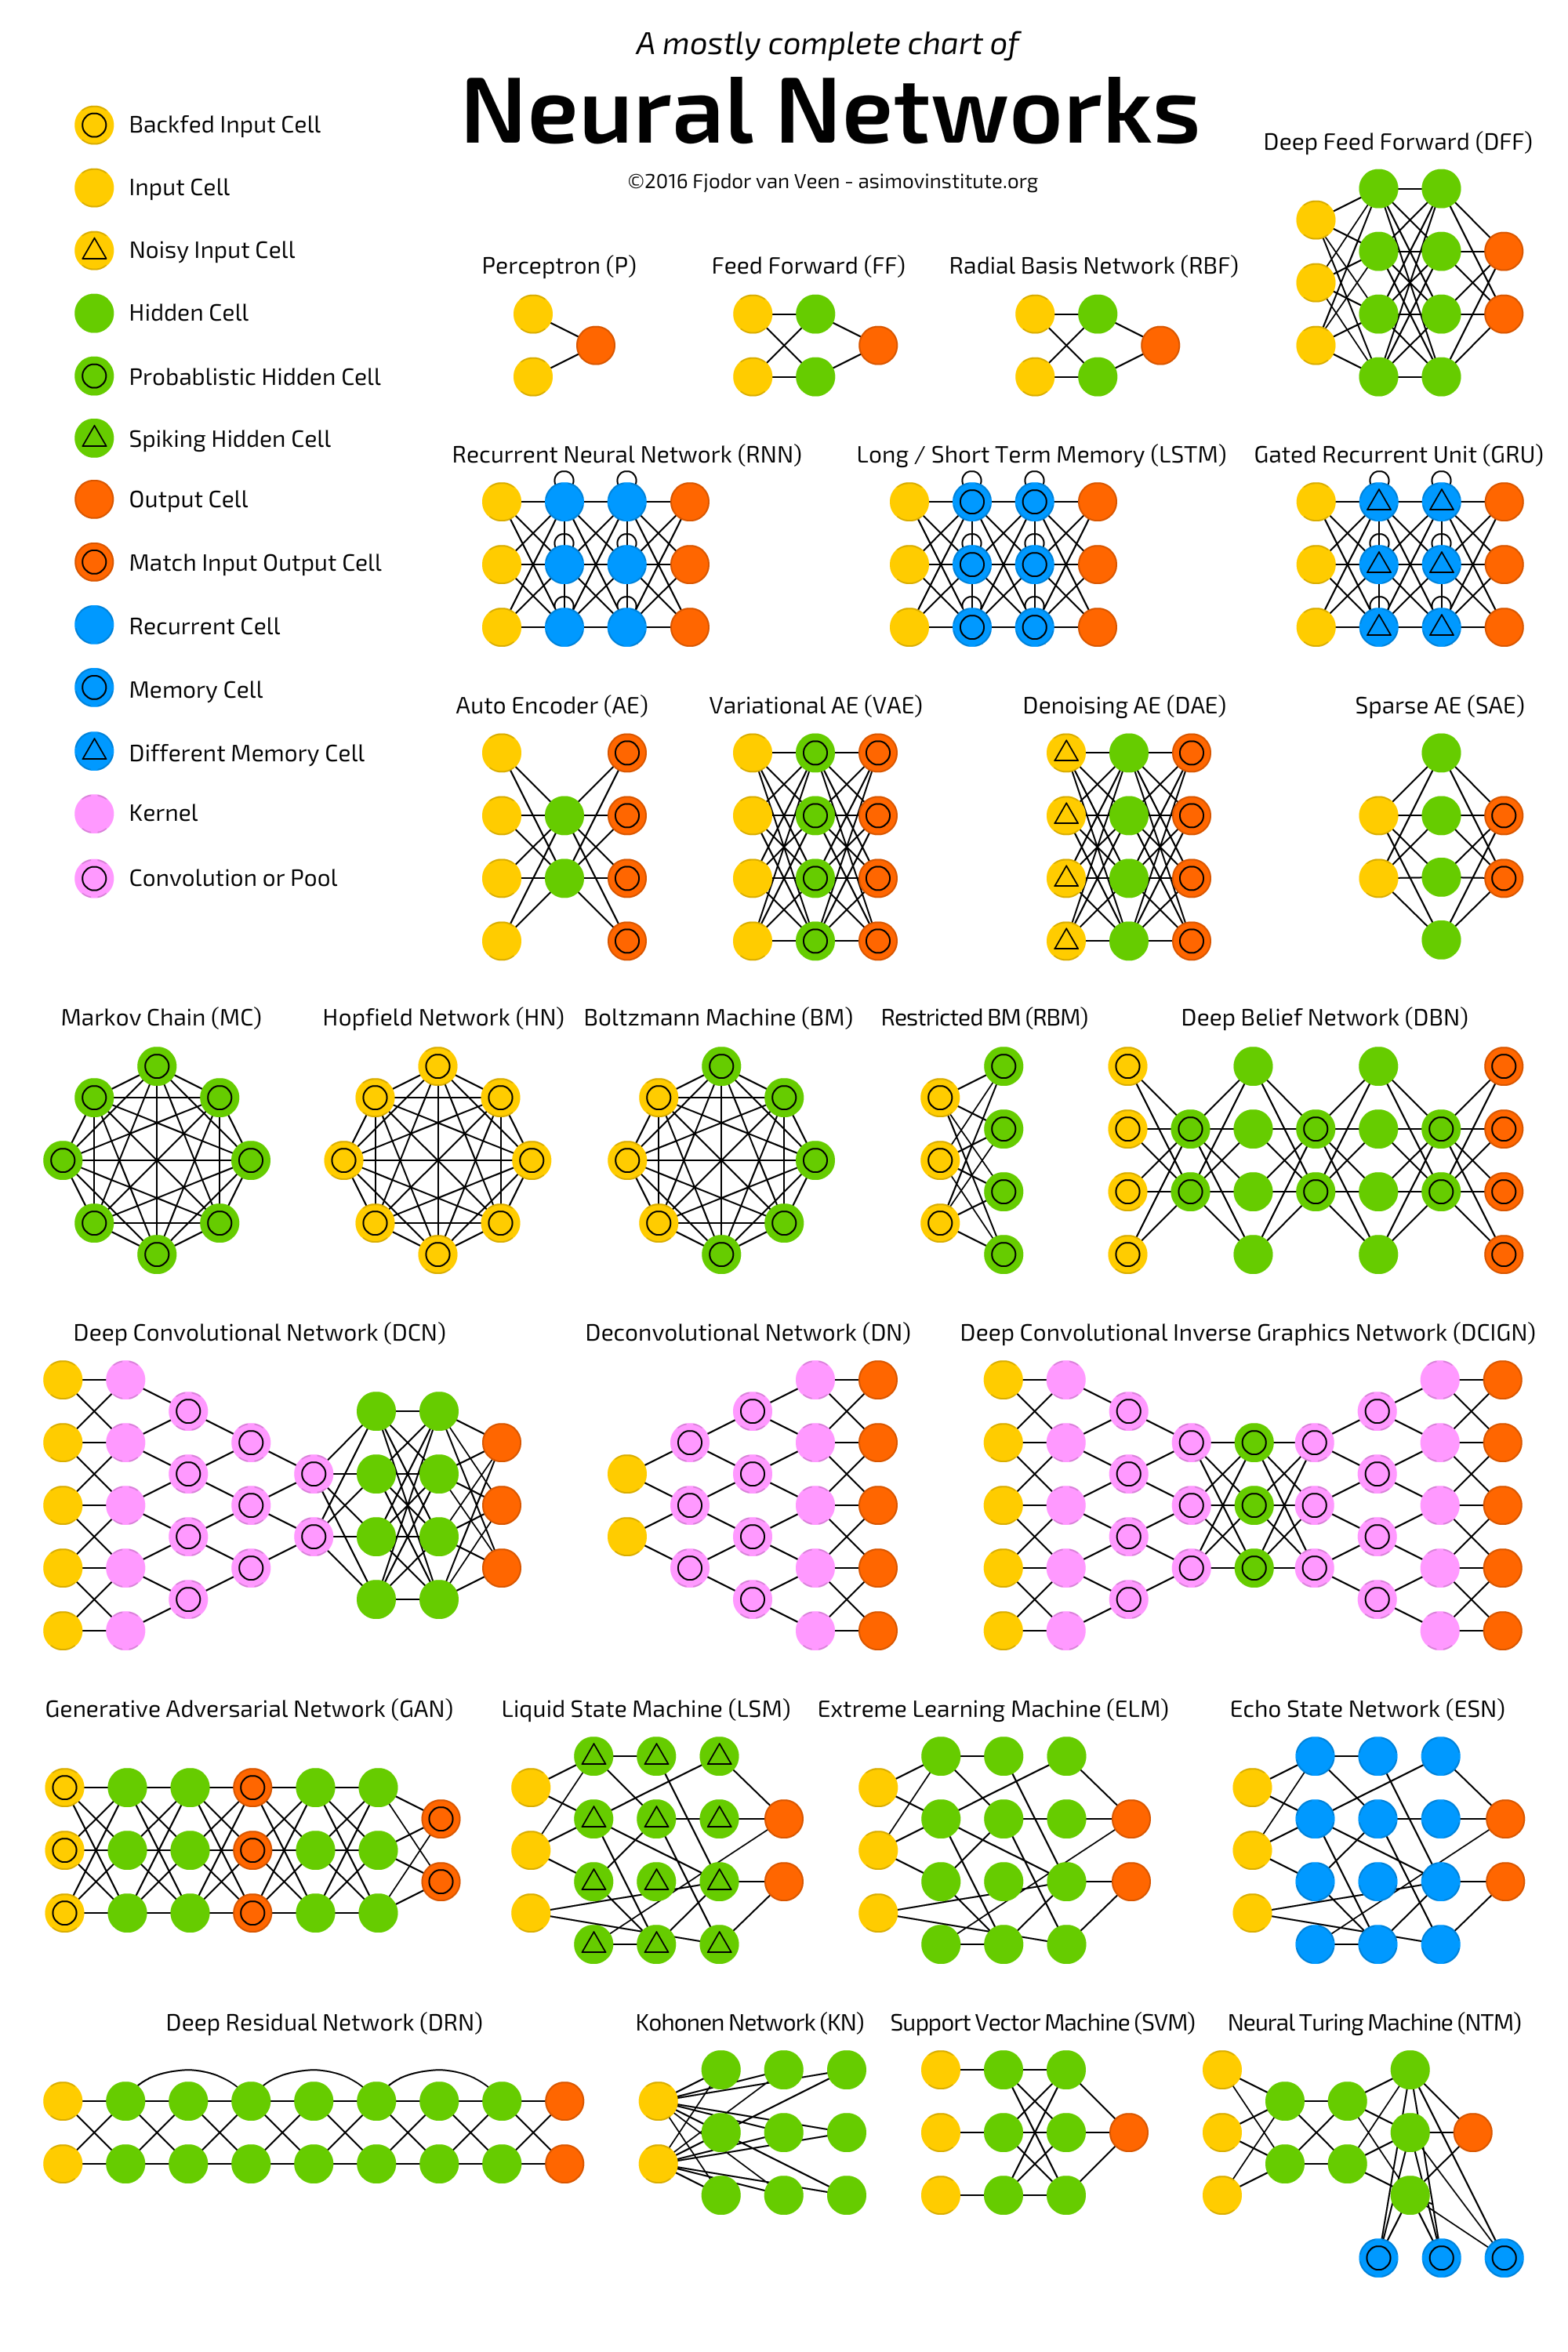

In [23]:
Image("neural_network_zoo.png")

In [25]:
# Let's experimenting with adding more neurons to the hidden layer in the neural network 

neurons = [1, 5, 10, 15, 20, 25]
accuracies = []

for n in neurons:
    mpl = MLPClassifier(hidden_layer_sizes = (n,), activation = "logistic")
    mpl.fit(train_features, train_labels)
    nn_predictions = mpl.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(accuracy)

print(accuracies)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

[0.48, 0.88, 0.84, 0.82, 0.82, 0.82]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


It seems like the test set prediction accuracy improved to `0.84` when using **ten or fifteen neurons** in the **hidden layer**.

Next, we can observe the effect of increasing the number of hidden layers on the overall accuracy of the network. Here's a diagram representing a **neural network** with **six neurons** in the **first hidden layer** and **four neurons** in the **second hidden layer**:

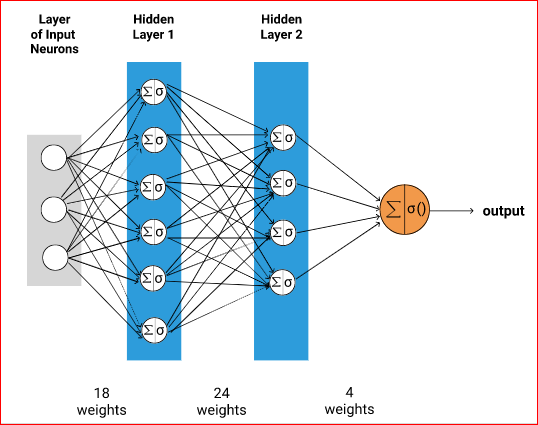

To determine the number of weights between the layers, multiply the number of neurons between those two layers. Remember that these weights will be represented as weight matrices.

To specify the number of hidden layers and the number of neurons in each hidden layer, we change the tuple we pass in to the `hidden_layer_sizes` parameter:

`# Network with 2 hidden layers, 1 neuron in each hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(1,1), activation='logistic')`

`# Network with 3 hidden layers of varying neuron counts in each hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(2,6,10), activation='logistic')`

The number of hidden layers and number of neurons in each hidden layer are hyperparameters that act as knobs for the model behavior. Hyperparameter optimization for neural networks requires a stronger mathematical foundation.

Neural networks often tend to take a long time to converge during the training process and many libraries have default values for the number of iterations of gradient descent to run. We can increase the number of iterations of gradient descent that's performed during the training process by modifying the `max_iter` parameter, which is set to `200` by default.

`mlp = MLPClassifier(hidden_layer_sizes=(1,1), activation='relu', max_iter=1000)`

When training this model locally, scikit-learn will output a warning message when all iterations of gradient descent occurred but the model han't converged yet.

In [27]:
# switch the activation function used in the hidden layers to the ReLU function.

neurons = [1, 5, 10, 15, 20, 25]
nn_accuracies = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes = (n,n), activation = "relu", max_iter = 1000)
    
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    
    accuracy = accuracy_score(test_labels, nn_predictions)
    nn_accuracies.append(accuracy)

print(nn_accuracies)

[0.52, 0.52, 1.0, 1.0, 1.0, 1.0]


As we increased the number of neurons in each layer, it looks like the accuracy increased all the way to `100%`! Even though this is a toy dataset (most real world data is much noisier), this is impressive and demonstrates the ability of neural networks to learn more complex decision boundaries.